In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('Body_Weight_Data.csv')
data.head()


,Weight,Height,Age,Gender
0,79,1.80,35,Male
1,69,1.68,39,Male
2,73,1.82,25,Male
3,95,1.70,60,Male
4,82,1.87,27,Male


In [3]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male = 1, Female = 0
data.head()


,Weight,Height,Age,Gender
0,79,1.80,35,1
1,69,1.68,39,1
2,73,1.82,25,1
3,95,1.70,60,1
4,82,1.87,27,1


In [4]:
x = data[['Height', 'Age', 'Gender']].values  # Features
y = data['Weight'].values.reshape(-1, 1)      # Target


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(x_test)

# Compare actual vs predicted
comparison = pd.DataFrame({
    'Actual Weight': y_test.flatten(),
    'Predicted Weight': y_pred.flatten()
})
print(comparison)


   Actual Weight  Predicted Weight
0             64         56.856510
1             69         79.105761


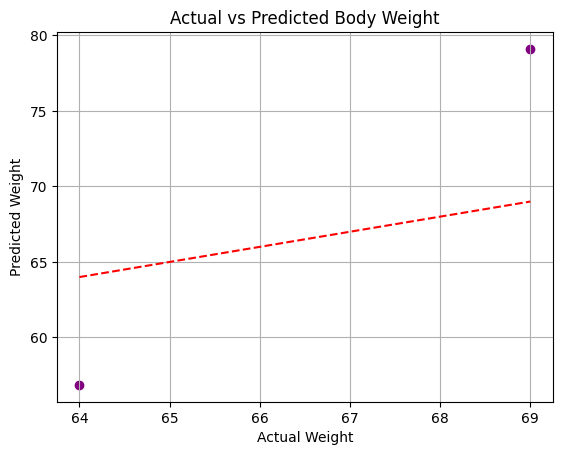

In [8]:
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Body Weight")
plt.grid(True)
plt.show()


In [9]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [-3.05521724]
Coefficients: [[32.8353363   0.31729474 14.62311848]]
